In [204]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing

import datetime

%matplotlib inline

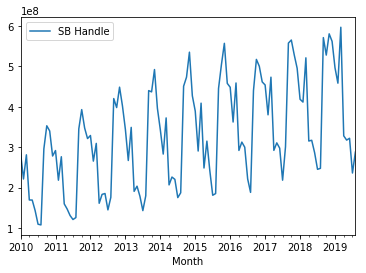

In [205]:
#visualizing existing data

df = pd.read_csv(r'C:\Users\ChunSangWoo\Sports Betting Data Scripts by State/NV Gambling Trends.csv')
df = df[['Month','SB Handle']]

df['Month']=pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df = df.reindex(index=df.index[::-1])

df.plot()

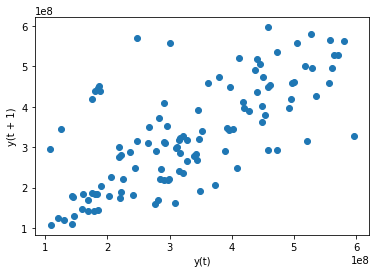

In [206]:
#checking for correlation/dependency 

pd.plotting.lag_plot(df['SB Handle'])

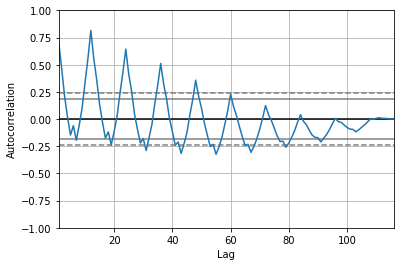

In [207]:
#autocorrelation plot

pd.plotting.autocorrelation_plot(df['SB Handle'])

In [227]:
df['SB Handle'].corr(df['SB Handle'].shift(12))

0.9702557651098069

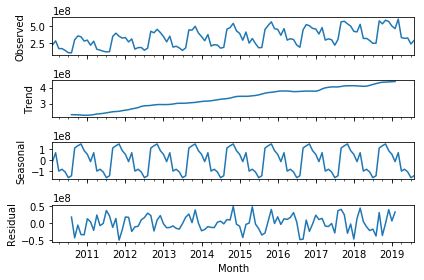

In [228]:
#testing for stationarity
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(df['SB Handle'], model='additive')
x = decomposed.plot() #See note below about this

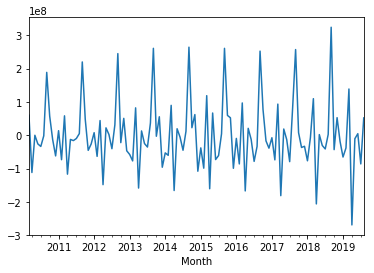

In [229]:
#differencing to get a more stationary data

df['stationary']=df['SB Handle'].diff()
df = df.dropna()
df['stationary'].plot()

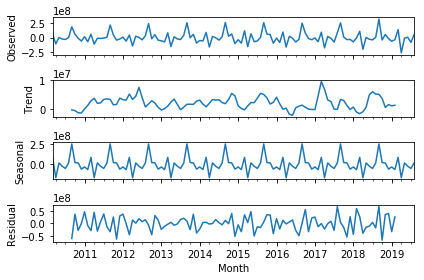

In [230]:
seasonaldecomposed = seasonal_decompose(df['stationary'], model='additive',filt=None)
x = seasonaldecomposed.plot() #See note below about this

In [231]:
from statsmodels.tsa.ar_model import AR
 
#create train/test datasets
X = df['stationary'].dropna()
train_data = X[1:len(X)-12]
test_data = X[X[len(X)-12:]]
 
#train the autoregression model
model = AR(train_data)
model_fitted = model.fit()

C:\Python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


In [232]:
print('The lag value chose is: %s' % model_fitted.k_ar)

The lag value chose is: 12


In [233]:
print('The coefficients of the model are:\n %s' % model_fitted.params)

The coefficients of the model are:
 const             1.469208e+07
L1.stationary    -5.929471e-01
L2.stationary    -5.907556e-01
L3.stationary    -6.411832e-01
L4.stationary    -5.519261e-01
L5.stationary    -6.898719e-01
L6.stationary    -5.248840e-01
L7.stationary    -6.444969e-01
L8.stationary    -6.363004e-01
L9.stationary    -5.720729e-01
L10.stationary   -6.894686e-01
L11.stationary   -5.186628e-01
L12.stationary    3.257992e-01
dtype: float64


C:\Python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


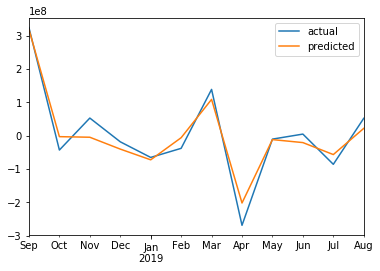

In [234]:
# make predictions 
predictions = model_fitted.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)

# create a comparison dataframe
compare_df = pd.concat(
    [df['stationary'].tail(12),
    predictions], axis=1).rename(
    columns={'stationary': 'actual', 0:'predicted'})

#plot the two values
compare_df.plot()

In [235]:
from sklearn.metrics import r2_score

r2 = r2_score(df['stationary'].tail(12), predictions)
r2

0.9341947741900791

In [225]:
from sklearn.metrics import mean_absolute_error

y_true = [df['stationary'].tail(12)]
y_pred = [predictions]
mean_absolute_error(y_true, y_pred)

24239204.939428538